In [1]:
# importing our libraries we will use 

import pandas as pd
import math
from scipy import stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# setting default seaborn theme
sns.set_theme()

In [3]:
# reading in our dataset
df = pd.read_csv("/datasets/games.csv")

In [4]:
# taking an initial look at the dataset

display(df.head())
print()
print()
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Prepare the Data

Changing column names to lower case for consistancy

In [5]:
df = df.rename(columns={
    'Name': 'name',
    'Platform': 'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating'
})

display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Missing Values

In [6]:
# name

# since we have two entries where the name is null, these will be better off removed, since we have no idea of knowing anything about this game
# other than it's sales numbers

# removing the rows where name is null
df = df[~df['name'].isnull()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [7]:
# year_of_release

print(df['year_of_release'].unique())

# since nan is the only non-year value represented in unique(), we will want to see how many null values there are for year
print()
print(df[df['year_of_release'].isnull()])

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

                                    name platform  year_of_release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP              NaN   
16405                      Freaky Flyers       GC              NaN   
16448                          Inversion       PC              NaN   
16458        Hakuouki: Shinsengumi Kitan      PS3              NaN

# Observations

We have 269 entries where year_of_release is null. That represents approximately 1.6% of records in the dataset. Having a missing year would make future analysis difficult, and I don't think using a mean/median year is good for data, since the video game industry changes so much year to year

In [8]:
# we will instead remove the records where year_of_release is missing

df = df[~df['year_of_release'].isnull()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [9]:
# we will instead remove the records where year_of_release is missing

df = df[~df['year_of_release'].isnull()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [10]:
# critic_score

# looking at the critic_score values to make sure there's nothing strange there
print(df['critic_score'].unique())

# these all look good, and the data type is float already.
# we can leave these as they are


[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]


In [11]:
# user_score

# looking at the user_score values to make sure there's nothing strange there
print(df['user_score'].unique())

# we have a weird 'tbd' value that we need to check out and most likely remove 

count_user_score = df['user_score'].value_counts()['tbd']

print()
print(f'There are {count_user_score} instances of "tbd" for user_score')

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

There are 2376 instances of "tbd" for user_score


# Observations

We can't remove 2376 records from this data frame. Our next best option will be to change 'tbd' values to null so they are ignored during calculations

In [12]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

print()

print(df['user_score'].unique())


['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [13]:
# rating

# checking unique values of rating
print(df['rating'].unique())

# how many nans are there?
print()
print(df['rating'].isnull().sum())

# same case as above, we'll leave this alone, since we have 6676 records with null for rating, and the rest of the values are okay

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']

6676


# Changing data types to appropriate types

In [14]:
# fresh list of the df columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [15]:
# user_score needs to be turned into a float

df['user_score'] = pd.to_numeric(df['user_score'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [16]:
# let's make "year_of_release" an int instead of float

print(df['year_of_release'].unique())

df['year_of_release'] = df['year_of_release'].astype("int")

df.info()

df.head()

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000. 1995. 1991. 1981. 1987. 1980.
 1983.]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Observations

We removed null values where we could, either removing entire rows where appropriate, or changing values to a standard nan missing value to exlude them from calculations in the future.

We changed 'user_score' to a float64 using pd.to_numeric() because it was an object before, and we would not have been able to use any mathematical functions on that data

In [17]:
# calculating total sales

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

display(df.head())


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Analyzing the data

In [18]:
# let's look at how many releases per year there are first

print(df['year_of_release'].value_counts())

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64


We have a good idea of what years have a significant amount of games released. We will put them into some broader categories next, so we can have an idea of releases by time periods.

In [19]:
# let's add a new column for a "release period", a range of years that each game released under. This will help us aggregate the data better

# we'll first need to get the min and max values of 'year_of_release'
min_year, max_year = df['year_of_release'].min(), df['year_of_release'].max()

print(f'Min year: {min_year} | Max year: {max_year}')

Min year: 1980 | Max year: 2016


In [20]:
# we have our range year. We'll go ahead and create some categories for each 5 years
# we'll create a function to then apply to the df to create a new column

def release_window(year):
    if year <= 1984:
        window = '1980-1984'
    elif year >= 1985 and year < 1990:
        window = '1985-1989'
    elif year >= 1990 and year < 1995:
        window = '1990-1994'
    elif year >= 1995 and year < 2000:
        window = '1995-1999'
    elif year >= 2000 and year < 2005:
        window = '2000-2004'
    elif year >= 2005 and year < 2010:
        window = '2005-2009'
    elif year >= 2010 and year < 2015:
        window = '2010-2014'
    else:
        window = '2015+'

    return window

In [21]:
# we'll apply our new function to create a new column called 'release_window'
df['release_window'] = df['year_of_release'].apply(release_window)

print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales release_window  
0        82.54      2005-2009  
1        40.24      19

In [22]:
release_window_counts = df['release_window'].value_counts().to_frame().reset_index()

print(release_window_counts)

       index  release_window
0  2005-2009            5995
1  2010-2014            4169
2  2000-2004            3198
3  1995-1999            1488
4      2015+            1108
5  1990-1994             281
6  1980-1984             122
7  1985-1989              83


The significant years we'll probably want to focus on would be 2000 and up, leaving anything below 2000 behind.

In [23]:
# let's filter our main df and remove anything that was released before the year 2000

df = df.query('year_of_release >= 2000')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14470 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14470 non-null  object 
 1   platform         14470 non-null  object 
 2   year_of_release  14470 non-null  int64  
 3   genre            14470 non-null  object 
 4   na_sales         14470 non-null  float64
 5   eu_sales         14470 non-null  float64
 6   jp_sales         14470 non-null  float64
 7   other_sales      14470 non-null  float64
 8   critic_score     7887 non-null   float64
 9   user_score       7371 non-null   float64
 10  rating           9663 non-null   object 
 11  total_sales      14470 non-null  float64
 12  release_window   14470 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 1.5+ MB


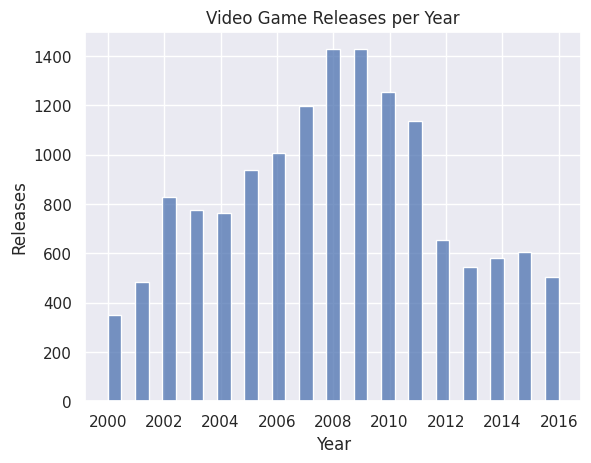

In [24]:
# distribution of game releases per year
sns.histplot(data=df, x='year_of_release')

plt.title('Video Game Releases per Year')
plt.ylabel('Releases')
plt.xlabel('Year')
plt.show()

# Platform Sales

In [25]:
# creating a new dataframe grouping each platform by the sum of its total sales
sales_platform = df.groupby('platform')['total_sales'].sum().to_frame().reset_index()

print(sales_platform.sort_values(by='total_sales', ascending=False).head(10))

   platform  total_sales
9       PS2      1233.56
17     X360       961.24
10      PS3       931.34
15      Wii       891.18
2        DS       802.76
11      PS4       314.14
4       GBA       312.88
12      PSP       289.53
0       3DS       257.81
18       XB       251.57


In [26]:
# let's take a look at a distribution of the top 5 platforms by year

# we'll take the top 5 platforms by total sales and filter the original df by those platforms

mask = ('PS2', 'X360', 'PS3', 'Wii', 'DS')

df_filtered_1 = df[df['platform'].isin(mask)]

print(df_filtered_1.head())

                    name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii             2006    Sports     41.36   
2         Mario Kart Wii      Wii             2008    Racing     15.68   
3      Wii Sports Resort      Wii             2009    Sports     15.61   
6  New Super Mario Bros.       DS             2006  Platform     11.28   
7               Wii Play      Wii             2006      Misc     13.96   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
6      9.14      6.50         2.88          89.0         8.5      E   
7      9.18      2.93         2.84          58.0         6.6      E   

   total_sales release_window  
0        82.54      2005-2009  
2        35.52      2005-2009  
3        32.77      2005-2009  


In [27]:
df_top_platform_sales = df_filtered_1.groupby(['platform', 'year_of_release'])['total_sales'].sum().to_frame().reset_index()

print(df_top_platform_sales)

   platform  year_of_release  total_sales
0        DS             2004        17.27
1        DS             2005       130.14
2        DS             2006       119.81
3        DS             2007       146.94
4        DS             2008       145.31
5        DS             2009       119.54
6        DS             2010        85.02
7        DS             2011        26.18
8        DS             2012        11.01
9        DS             2013         1.54
10      PS2             2000        39.17
11      PS2             2001       166.43
12      PS2             2002       205.38
13      PS2             2003       184.31
14      PS2             2004       211.81
15      PS2             2005       160.66
16      PS2             2006       103.42
17      PS2             2007        75.99
18      PS2             2008        53.90
19      PS2             2009        26.40
20      PS2             2010         5.64
21      PS2             2011         0.45
22      PS3             2006      

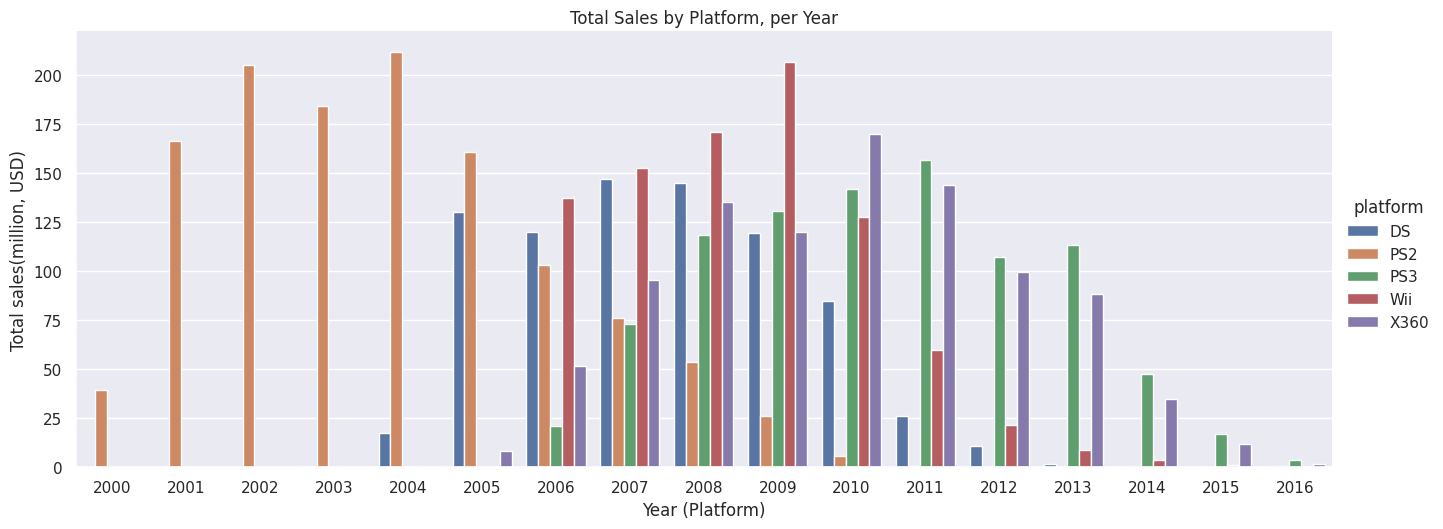

In [28]:
# now that we have the dataframe of platform, year and total sales
# we can create a distribution



sns.catplot(
    data=df_top_platform_sales,
    kind="bar",
    x="year_of_release",
    y="total_sales",
    hue="platform",
    height=5,
    aspect=2.67
)

plt.title("Total Sales by Platform, per Year")
plt.ylabel("Total sales(million, USD)")
plt.xlabel("Year (Platform)")



plt.show()

Observation In addition to seeing the sales by platform, per year, this chart also helps us see the rise and fall of different platforms.

For example, we can see PS2 surge to popularity from 2000-2004, and then watch it begin to decline over the next 4 or so years, until it's obscure after 2010.

Looking at the top 5 platforms by sales, we can discern the following timeframe visually:

PS2: 2000-2010
DS: 2004-2012
X360: 2005-2015
PS3: 2006-2016
Wii: 2006-2013
If we want to look at building a dataset for future modeling, we'll want to change our approach and look at the platforms that are currently popular in the most recent years of the data

In [29]:
# we'll take the most recent 3 years of data, from 2014-2016

df = df.query('year_of_release >= 2014')

print(df)

                                            name platform  year_of_release  \
31                     Call of Duty: Black Ops 3      PS4             2015   
42                            Grand Theft Auto V      PS4             2014   
47     Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
77                                       FIFA 16      PS4             2015   
87                  Star Wars Battlefront (2015)      PS4             2015   
...                                          ...      ...              ...   
16703                           Strawberry Nauts      PSV             2016   
16707                           Aiyoku no Eustia      PSV             2014   
16710              Samurai Warriors: Sanada Maru      PS3             2016   
16712                    Haitaka no Psychedelica      PSV             2016   
16714                        Winning Post 8 2016      PSV             2016   

              genre  na_sales  eu_sales  jp_sales  other_sales 

Now we'll redo the analysis above and find out the top platforms of our new filtered dataset
This will help us determine trends for future modeling

In [30]:
sales_platform_recent = df.groupby('platform')['total_sales'].sum().to_frame().reset_index()

print(sales_platform_recent.sort_values(by='total_sales', ascending=False).head(10))

  platform  total_sales
3      PS4       288.15
9     XOne       140.36
0      3DS        86.68
2      PS3        68.18
8     X360        48.22
7     WiiU        42.98
1       PC        27.05
5      PSV        22.40
6      Wii         5.07
4      PSP         0.36


Before we make any conclusions about the top platforms, we'll want to plot this like above, to see any trends in sales rising or falling
Let's also put PC in here, even though it's not top 5, because it's always a consistent platform

In [31]:
mask2 = ('PS4', 'XOne', '3DS', 'PS3', 'X360', 'PC')

df_filtered_2 = df[df['platform'].isin(mask2)]

print(df_filtered_2.head())

                                         name platform  year_of_release  \
31                  Call of Duty: Black Ops 3      PS4             2015   
42                         Grand Theft Auto V      PS4             2014   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
77                                    FIFA 16      PS4             2015   
87               Star Wars Battlefront (2015)      PS4             2015   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31       Shooter      6.03      5.86      0.36         2.38           NaN   
42        Action      3.96      6.31      0.38         1.97          97.0   
47  Role-Playing      4.35      3.49      3.10         0.74           NaN   
77        Sports      1.12      6.12      0.06         1.28          82.0   
87       Shooter      2.99      3.49      0.22         1.28           NaN   

    user_score rating  total_sales release_window  
31         NaN    NaN        14.63

In [32]:
df_top_platform_sales_recent = df_filtered_2.groupby(['platform', 'year_of_release'])['total_sales'].sum().to_frame().reset_index()

print(df_top_platform_sales_recent)

   platform  year_of_release  total_sales
0       3DS             2014        43.76
1       3DS             2015        27.78
2       3DS             2016        15.14
3        PC             2014        13.28
4        PC             2015         8.52
5        PC             2016         5.25
6       PS3             2014        47.76
7       PS3             2015        16.82
8       PS3             2016         3.60
9       PS4             2014       100.00
10      PS4             2015       118.90
11      PS4             2016        69.25
12     X360             2014        34.74
13     X360             2015        11.96
14     X360             2016         1.52
15     XOne             2014        54.07
16     XOne             2015        60.14
17     XOne             2016        26.15


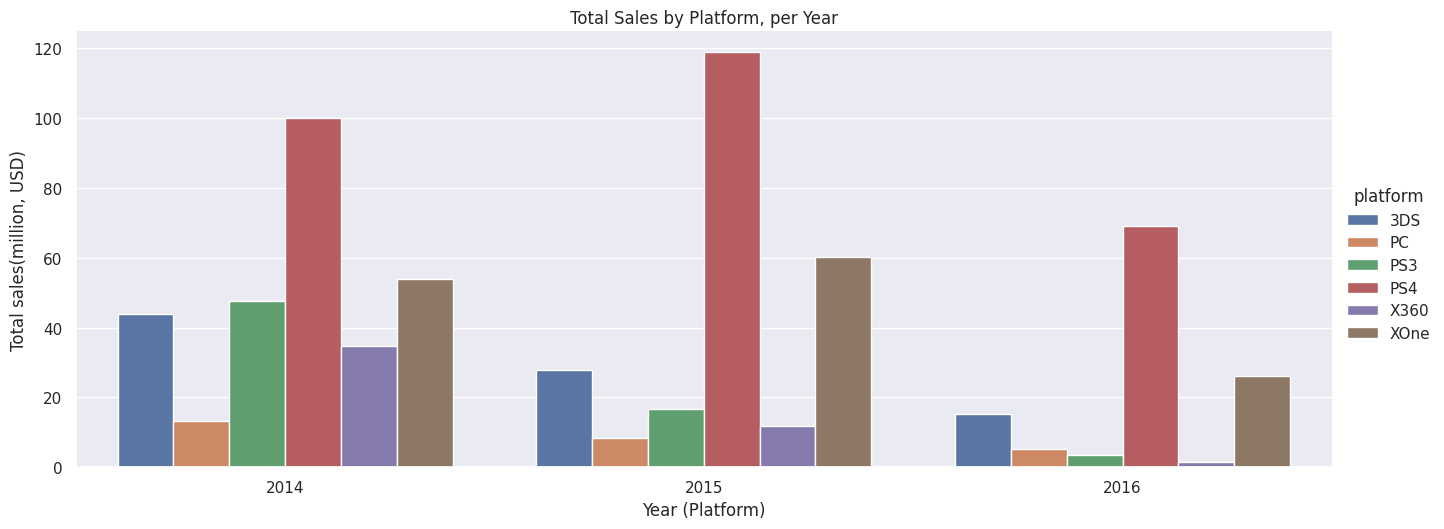

In [33]:
sns.catplot(
    data=df_top_platform_sales_recent,
    kind="bar",
    x="year_of_release",
    y="total_sales",
    hue="platform",
    height=5,
    aspect=2.67
)

plt.title("Total Sales by Platform, per Year")
plt.ylabel("Total sales(million, USD)")
plt.xlabel("Year (Platform)")



plt.show()

# Observation

We can see in our new dataset, the newer consoles like the PS4 and the XOne are soaring up, while the previous front-runners like the X360 and PS3 are starting to fall behind.

The 3DS was pretty popular too, but it's beginning to taper off, and looks like it will be quite low in 2017, so we won't consider it.

PC, while not a huge seller, remains somewhat consistent. Based on the tapering sales of all platforms in 2016, and knowing that the next-gen consoles were still a few years out, I am thinking we may have an incomplete dataset for 2016 data. I will make an educated guess that if we did have complete 2016 data, XOne, PS4 and PC would be higher, so we are going to focus on those 3 platforms going forward.

Now that we have selected our 3 platforms for further analysis, we'll want to create a new dataframe filtered by those platforms only so we can get an idea of the distribution of sales.

In [34]:
# we are going to create a new dataframe, so we can keep all data in-tact if we need it for future analyses. 

mask3 = ('PS4', 'XOne', 'PC')
df_profitable_platforms = df[df['platform'].isin(mask3)]

print(df_profitable_platforms)

                                                name platform  \
31                         Call of Duty: Black Ops 3      PS4   
42                                Grand Theft Auto V      PS4   
77                                           FIFA 16      PS4   
87                      Star Wars Battlefront (2015)      PS4   
92                    Call of Duty: Advanced Warfare      PS4   
...                                              ...      ...   
16643                              Rugby Challenge 3     XOne   
16645                                         ZombiU     XOne   
16660                               Prison Architect     XOne   
16672  Metal Gear Solid V: The Definitive Experience     XOne   
16692              Metal Gear Solid V: Ground Zeroes       PC   

       year_of_release    genre  na_sales  eu_sales  jp_sales  other_sales  \
31                2015  Shooter      6.03      5.86      0.36         2.38   
42                2014   Action      3.96      6.31      0.38  

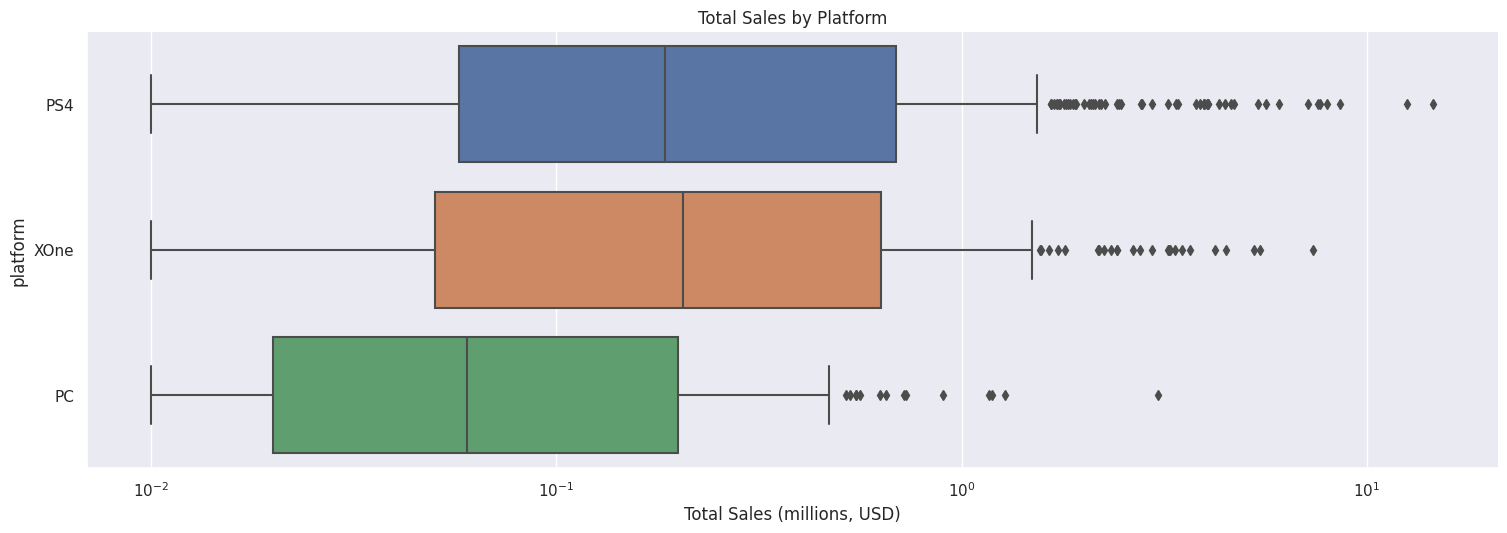

In [35]:
# now that we have our dataframe set up, we can visualize the distribution of sales using a boxplot

sns.catplot(
    data=df_profitable_platforms,
    x="total_sales",
    y="platform",
    kind="box",
    height=5,
    aspect=3
)
plt.xlabel("Total Sales (millions, USD)")
plt.xscale("log")
plt.title("Total Sales by Platform")
plt.show()

In [36]:
# Let's look at the average total_sales value for each platform above

avg_ps4 = df_profitable_platforms.query("platform == 'PS4'")['total_sales'].mean()
avg_xone = df_profitable_platforms.query("platform == 'XOne'")['total_sales'].mean()
avg_pc = df_profitable_platforms.query("platform == 'PC'")['total_sales'].mean()

print('Average total_sales value of PS4 titles:', avg_ps4)
print('Average total_sales value of XOne titles:', avg_xone)
print('Average total_sales value of PC titles:', avg_pc)

Average total_sales value of PS4 titles: 0.7663563829787233
Average total_sales value of XOne titles: 0.6156140350877193
Average total_sales value of PC titles: 0.17913907284768213


# Observations

PS4 and XOne sales are relatively similar across the board. XOne has a higher median of total sales per game, while PS4 has more high outliers.

PC is behind them, both in range and median total sales, which is expected based on the analysis above.

PS4 has higher average sales, followed by XOne, with PC significantly lower behind them.

In [37]:
# We'll look next at the correlation between user reviews and total sales, for the PS4 platform

ps4_review_sales = df.query("platform == 'PS4'")

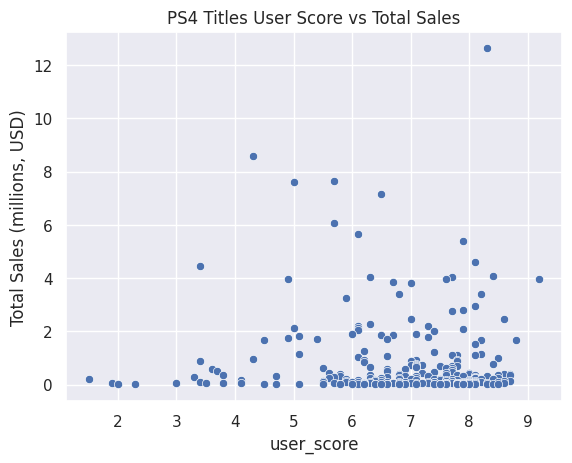

In [38]:
sns.scatterplot(
    data=ps4_review_sales,
    x="user_score",
    y="total_sales",
)

plt.title('PS4 Titles User Score vs Total Sales')
plt.ylabel('Total Sales (millions, USD)')
plt.show()

In [39]:
d = {'user_score': ps4_review_sales['user_score'], 'total_sales': ps4_review_sales['total_sales']}
ps4_correlation = pd.DataFrame(data=d)

In [40]:
ps4_coefficient = ps4_correlation.corr(method='pearson')

print(ps4_coefficient)

             user_score  total_sales
user_score     1.000000    -0.040132
total_sales   -0.040132     1.000000


# Observations

Looking at the correlation coefficient between user_score and total_sales for PS4 titles, we are showing a very slight negative coefficient, which tells us the two variables will tend to move in opposite directions -- as user_scores drop, total_sales will increase.

Technically speaking, that is true for negative coefficients, but with one so low of -0.04, we are very close to no correlation at all, meaning that user reviews do not have any impact on total_sales of a title.

Now that we have selected our 3 platforms for further analysis, we'll want to create a new dataframe filtered by those platforms only so we can get an idea of the distribution of sales.

In [41]:
xone_review_sales = df.query("platform == 'XOne'")

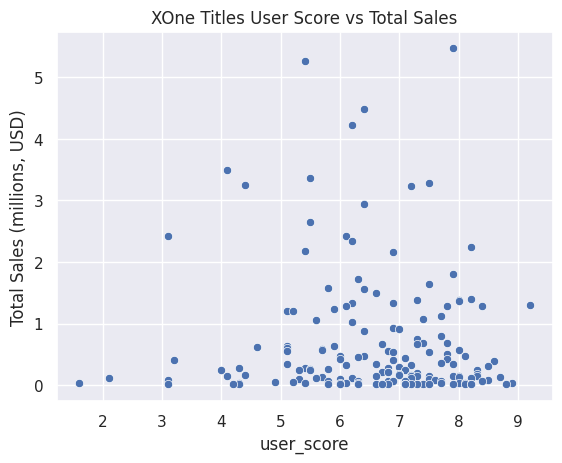

In [42]:
sns.scatterplot(
    data=xone_review_sales,
    x="user_score",
    y="total_sales"
)

plt.title('XOne Titles User Score vs Total Sales')
plt.ylabel('Total Sales (millions, USD)')
plt.show()

In [43]:
e = {'user_score': xone_review_sales['user_score'], 'total_sales': xone_review_sales['total_sales']}
xone_correlation = pd.DataFrame(data=e)

In [44]:
xone_coefficient = xone_correlation.corr(method='pearson')

print(xone_coefficient)

             user_score  total_sales
user_score     1.000000    -0.070384
total_sales   -0.070384     1.000000


In [45]:
# now we'll look at PC

pc_review_sales = df.query("platform == 'PC'")

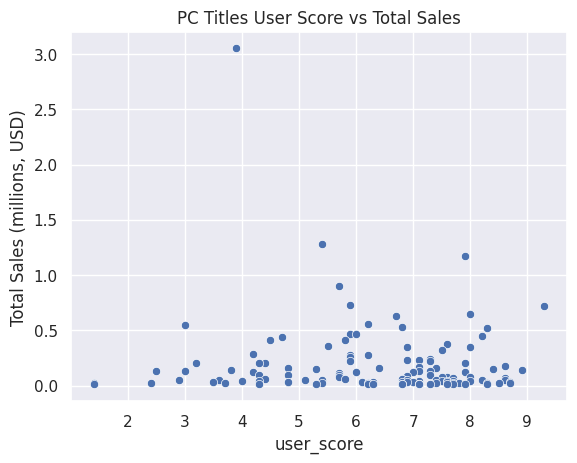

In [46]:
sns.scatterplot(
    data=pc_review_sales,
    x="user_score",
    y="total_sales"
)

plt.title('PC Titles User Score vs Total Sales')
plt.ylabel('Total Sales (millions, USD)')
plt.show()

In [47]:
f = {'user_score': pc_review_sales['user_score'], 'total_sales': pc_review_sales['total_sales']}
pc_correlation = pd.DataFrame(data=f)

In [48]:
pc_coefficient = pc_correlation.corr(method='pearson')

print(pc_coefficient)

             user_score  total_sales
user_score     1.000000    -0.071597
total_sales   -0.071597     1.000000


# Observation

We are seeing roughly the same data as the PS4 titles. A -0.07 correlation coefficient, which is very close to 0, meaning there really is not any correlation between user reviews and total sales of a video game title.

Interesting observation!

It's not part of the project prompt, but I am wondering if critic scores have any correlation on total sales, so let's check that out too!

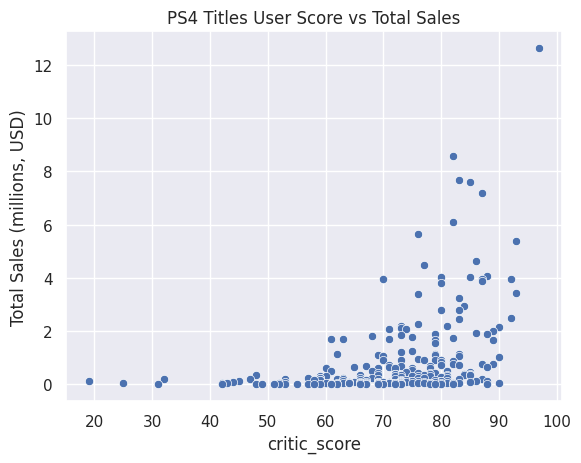

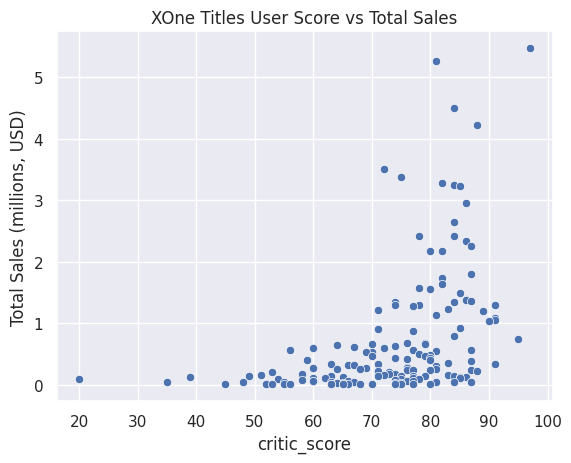

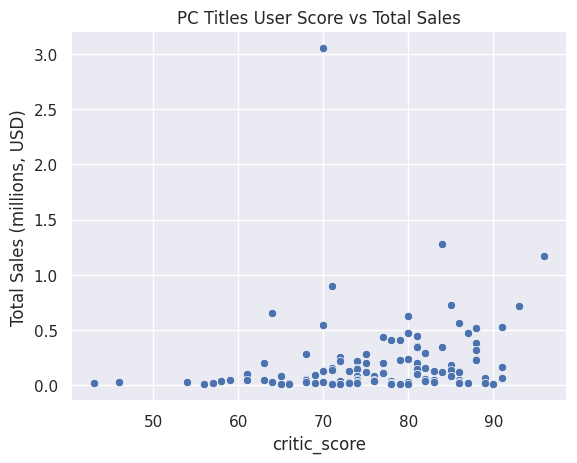

In [49]:
# we can use our existing dataframes we already created, we just need new masks to grab the critic score instead of the user score

sns.scatterplot(
    data=ps4_review_sales,
    x="critic_score",
    y="total_sales"
)

plt.title('PS4 Titles User Score vs Total Sales')
plt.ylabel('Total Sales (millions, USD)')
plt.show()


sns.scatterplot(
    data=xone_review_sales,
    x="critic_score",
    y="total_sales"
)

plt.title('XOne Titles User Score vs Total Sales')
plt.ylabel('Total Sales (millions, USD)')
plt.show()


sns.scatterplot(
    data=pc_review_sales,
    x="critic_score",
    y="total_sales"
)

plt.title('PC Titles User Score vs Total Sales')
plt.ylabel('Total Sales (millions, USD)')
plt.show()

In [50]:
d2 = {'critic_score': ps4_review_sales['critic_score'], 'total_sales': ps4_review_sales['total_sales']}
ps4_correlation_critic = pd.DataFrame(data=d2)

e2 = {'critic_score': xone_review_sales['critic_score'], 'total_sales': xone_review_sales['total_sales']}
xone_correlation_critic = pd.DataFrame(data=e2)

f2 = {'critic_score': pc_review_sales['critic_score'], 'total_sales': pc_review_sales['total_sales']}
pc_correlation_critic = pd.DataFrame(data=f2)

In [51]:
ps4_coefficient_critic = ps4_correlation_critic.corr(method='pearson')

print('PS4 correlation')
print(ps4_coefficient_critic)
print()

xone_coefficient_critic = xone_correlation_critic.corr(method='pearson')

print('XOne correlation')
print(xone_coefficient_critic)
print()

pc_coefficient_critic = pc_correlation_critic.corr(method='pearson')

print('PC correlation')
print(pc_coefficient_critic)

PS4 correlation
              critic_score  total_sales
critic_score      1.000000     0.402661
total_sales       0.402661     1.000000

XOne correlation
              critic_score  total_sales
critic_score      1.000000     0.428677
total_sales       0.428677     1.000000

PC correlation
              critic_score  total_sales
critic_score      1.000000     0.174634
total_sales       0.174634     1.000000


# Observation

Interesting! When we do the same analysis using Critic Score instead of User score, we see a somewhat significant positive correlation between the critic reviews and total sales!

(While PC's correlation isn't as high, it may be because they have lower overall sales, so perhaps not as many opportunities to see similar data as the other two platforms.)

It seems that consumers are more influenced by the expert's reviews, rather than those of their peers.

In [52]:
# let's look next at the distribution of games by genre across the dataset we have

genre_dist = df.groupby('genre')['total_sales'].mean()


print(genre_dist.sort_values(ascending=False))

genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Racing          0.398841
Misc            0.332301
Action          0.322068
Simulation      0.298409
Puzzle          0.157857
Strategy        0.107027
Adventure       0.094865
Name: total_sales, dtype: float64


In [53]:
# taking total_sales and genre from df to make a new dataframe in order to plot the distribution of sales per genre
genre_data = {'total_sales': df['total_sales'], 'genre': df['genre']}

profitable_genres = pd.DataFrame(data=genre_data)

profitable_genres.head()

,total_sales,genre
31,14.63,Shooter
42,12.62,Action
47,11.68,Role-Playing
77,8.58,Sports
87,7.98,Shooter


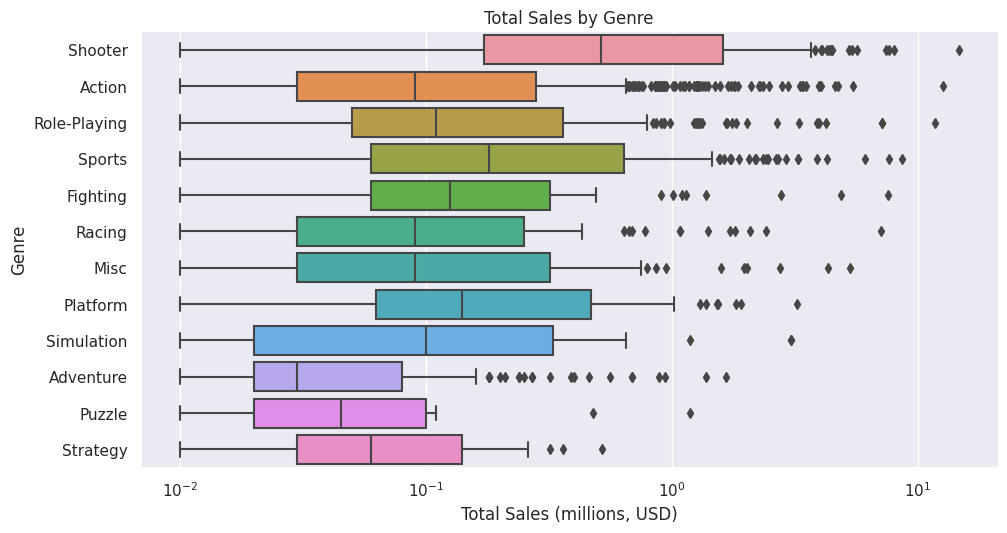

In [54]:
# let's visualize the distribution of genre mean sales

sns.catplot(
    data=profitable_genres,
    kind='box',
    x='total_sales',
    y='genre',
    height=5,
    aspect=2
    )


plt.xscale('log')
plt.xlabel('Total Sales (millions, USD)')
plt.ylabel('Genre')
plt.title('Total Sales by Genre')
plt.show()

# Observations

Looking at our visualization for total sales by genre, the following conclusions can be made:

Shooters are likely the most profitable games. They have the highest mean total sales, far greater than any of the other genres, and less outliers, meaning they have a more expected profit.
Action games have a low average total sales, and a ton of outliers. This leads us to believe that overall, the genre struggles to make sales on average, but beacuse it is such a popular genre, many have been successful and had high sales.
Adventure games have the lowest mean total sales by far, and even its outliers do not make very much money. That is a genre we should avoid if we are looking for profit.


Based on these conclusions, and the rest of the data we can see, we can conclude that the following genres are the most profitable:

Shooter
Sports
Platform

In [55]:
print(df)

                                            name platform  year_of_release  \
31                     Call of Duty: Black Ops 3      PS4             2015   
42                            Grand Theft Auto V      PS4             2014   
47     Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
77                                       FIFA 16      PS4             2015   
87                  Star Wars Battlefront (2015)      PS4             2015   
...                                          ...      ...              ...   
16703                           Strawberry Nauts      PSV             2016   
16707                           Aiyoku no Eustia      PSV             2014   
16710              Samurai Warriors: Sanada Maru      PS3             2016   
16712                    Haitaka no Psychedelica      PSV             2016   
16714                        Winning Post 8 2016      PSV             2016   

              genre  na_sales  eu_sales  jp_sales  other_sales 

In [56]:
# NA top platforms by sales
na_top_platforms = df.groupby('platform')['na_sales'].sum()
print(na_top_platforms.sort_values(ascending=False).head())

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64


In [57]:
# EU top platforms by sales
eu_top_platforms = df.groupby('platform')['eu_sales'].sum()
print(eu_top_platforms.sort_values(ascending=False).head())

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64


In [58]:
# JP top platforms by sales
jp_top_platforms = df.groupby('platform')['jp_sales'].sum()
print(jp_top_platforms.sort_values(ascending=False).head())

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64


# Observations

In NA and EU, the current-generation consoles are thriving, with PS4 and XOne dominating the sales in both regions. In EU, the PS4 is vastly more popular than the XOne, where in NA, they are much closer in popularity.

JP's sales are much different. It seems hand-held gaming is the most popular, with the 3DS leading sales by a large margin, and the PSV being in the top 3 as well. The XOne is nowhere to be seen, which could make sense considering Sony is a Japanese company.

# Top 5 Genres by Region

In [59]:
# NA top genres by sales
na_top_genres = df.groupby('genre')['na_sales'].sum()
print(na_top_genres.sort_values(ascending=False).head())

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64


In [60]:
# EU top genres by sales
eu_top_genres = df.groupby('genre')['eu_sales'].sum()
print(eu_top_genres.sort_values(ascending=False).head())

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64


In [61]:
# JP top genres by sales
jp_top_genres = df.groupby('genre')['jp_sales'].sum()
print(jp_top_genres.sort_values(ascending=False).head())

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64


# Observations

NA and EU tend to have similar taste in genres, seeing that the top 4 in each region are the same ones, just in slightly different orders. The only main difference being Misc/Racing for NA/EU on that 5th slot. Perhaps NA consumers play a wider variety of other games more commonly, whereas Racing is more popular in EU because of the prevelence of things like Formula 1.

The most popular genre in JP being Role-Playing makes sense, considering there is an entire genre of video games called "JRPG", for Japanese Roll Playing Game.

# Do ESRB Ratings affect sales in individual regions?

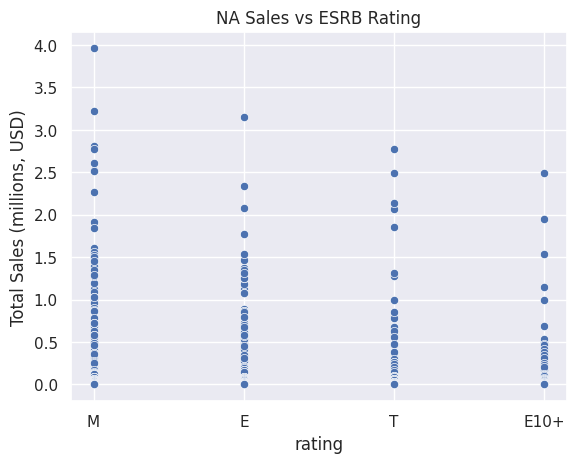

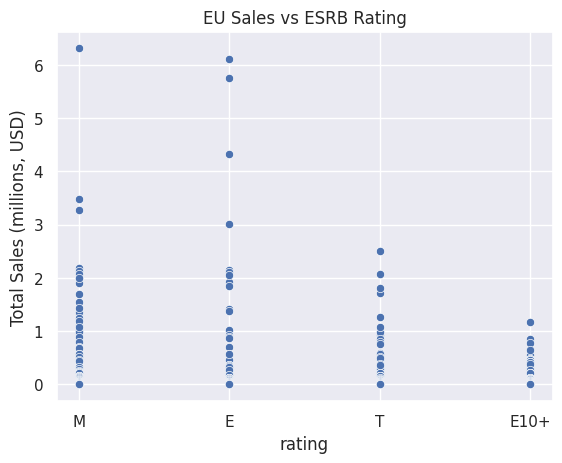

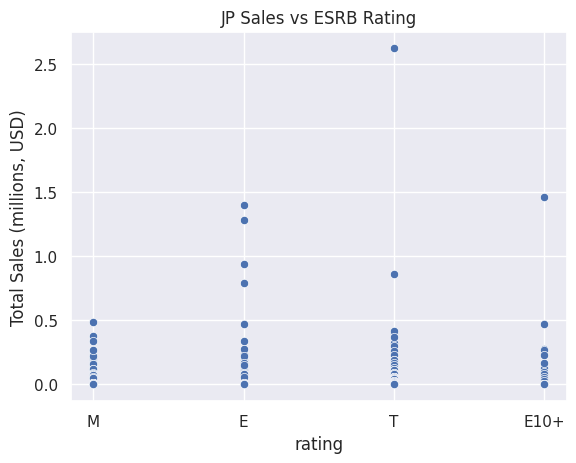

In [62]:
# we will repeat our process from the scatter plots above to view the correlation between ESRB rating and sales per region

# na sales
sns.scatterplot(
    data=df,
    x="rating",
    y="na_sales"
)

plt.title('NA Sales vs ESRB Rating')
plt.ylabel('Total Sales (millions, USD)')
plt.show()


# eu sales
sns.scatterplot(
    data=df,
    x="rating",
    y="eu_sales"
)

plt.title('EU Sales vs ESRB Rating')
plt.ylabel('Total Sales (millions, USD)')
plt.show()


# jp sales
sns.scatterplot(
    data=df,
    x="rating",
    y="jp_sales"
)

plt.title('JP Sales vs ESRB Rating')
plt.ylabel('Total Sales (millions, USD)')
plt.show()

# Observations

In EU and NA, it seems the M rated games have the highest sales. This could be perhaps that those who are playing Mature rated games, are the adults who have the disposable income to continue purchasing these games.

In JP, it seems M rated games have the lowest sales. This could be a culture thing, where those types of games aren't as popular as games for a younger audience, such as the E or T games.

## Testing Hypotheses

Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same.

Null hypothesis: There is no significant statistical diference between the user ratings of XOne and PC platforms
Alternative hypothesis: There is a difference between the average user ratings of Xbox One and PC Platforms

In [63]:
# creating our datasets for the first test

xone_filter = df.query('platform == "XOne"')['user_score']
pc_filter = df.query('platform == "PC"')['user_score']

# removing nan values so we can run ttest_ind
xone_filter = xone_filter.dropna()
pc_filter = pc_filter.dropna()

In [64]:
# running our test

alpha = 0.05 

results = st.ttest_ind(xone_filter, pc_filter, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis')

p-value: 0.11601398086668832
We cannot reject the null hypothesis


# Observations

I chose an alpha threshold of 0.05, because it is the standard accepted significance level for hypothesis testing. I used ttest.ind() because we are testing two independent samples.

With a pvalue of 0.116, we do not have sufficient evidence to reject the null hypothesis that there are no significant statistical differnces between the user ratings of XOne and PC platforms. This doesn't mean that the inverse is true, just that we cannot reject the null hypothesis. We can take a little bit of a further look though, to see where the average user ratings lie.

In [65]:
# looking at the mean, variance and std deviation of the two datasets of XOne and PC user reviews

xone_mean = xone_filter.mean()
print('XOne user review mean:', xone_mean)

pc_mean = pc_filter.mean()
print('PC user review mean:', pc_mean)
print()

xone_var = np.var(xone_filter)
print('XOne user review variance:', xone_var)

pc_var = np.var(pc_filter)
print('PC user review variance:', pc_var)
print()

xone_std = np.std(xone_filter)
print('XOne user review standard deviation:', xone_std)

pc_std = np.std(pc_filter)
print('PC user review standard deviation:', pc_std)

XOne user review mean: 6.594545454545456
PC user review mean: 6.298360655737705

XOne user review variance: 1.8795460055096425
PC user review variance: 2.8773743617307175

XOne user review standard deviation: 1.3709653553280048
PC user review standard deviation: 1.6962825123577492


Observations

XOne titles have a higher average user score than PC titles. XOne has lower variance, and lower standard deviation, meaning the reviews are more concentrated around the mean, compared to PC titles.

Hypothesis 2: Average user ratings for the Action and Sports genres are different.

Null hypothesis: The average user ratings for the Action and Sports genres are not different
Alternative hypothesis: The average user ratings for the Action and Sports genres are different

In [66]:
action_filter = df.query('genre == "Action"')['user_score']
sports_filter = df.query('genre == "Sports"')['user_score']

# removing nan values so we can run ttest_ind
action_filter = action_filter.dropna()
sports_filter = sports_filter.dropna()

In [67]:
# running our test

alpha2 = 0.05 

results2 = st.ttest_ind(action_filter, sports_filter, equal_var=False)

print('p-value:', results2.pvalue)

if results2.pvalue < alpha2:
    print('We reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis')

p-value: 1.1825550382644557e-14
We reject the null hypothesis


Observations

Again, I chose an alpha value of 0.05 because it is the standard accepted significance level, and I used ttest_ind() because we are comparing two independent samples.

Our pvalue was 1.18e-14, which allows us to reject the null hypothesis. This tells us that there is in fact a difference in user reviews between the two genres.

Let's take a closer look at what those differences may be.

In [68]:
# looking at the mean, variance and std deviation of the two datasets of XOne and PC user reviews

action_mean = action_filter.mean()
print('Action titles user review mean:', action_mean)

sports_mean = sports_filter.mean()
print('Sports titles user review mean:', sports_mean)
print()

action_var = np.var(action_filter)
print('Action titles user review variance:', action_var)

sports_var = np.var(sports_filter)
print('Sports titles user review variance:', sports_var)
print()

action_std = np.std(action_filter)
print('Action titles user review standard deviation:', action_std)

sports_std = np.std(sports_filter)
print('Sports titles user review standard deviation:', sports_std)

Action titles user review mean: 6.760606060606061
Sports titles user review mean: 5.2251968503937

Action titles user review variance: 1.89208448117539
Sports titles user review variance: 3.4198375596751185

Action titles user review standard deviation: 1.3755306180435933
Sports titles user review standard deviation: 1.8492802815352567


# Conclusion

Intro

We set out to analyze data about video game sales across multiple platforms and regions, from 1980-2016, with the goal of trying to build a model for 2017.

In order to do this, we had to sacrifice a lot of the data from the past, where those games and platforms are no longer relevent when looking towards the future. We began working with a dataset that focused on video games released from 2014 onward.

Data Analysis

We did extensive data analysis of total sales across multiple years, platforms and genres. We decided that the 3 most profitable platforms moving forward would be:

PS4
XOne
PC
These represented a majority of total sales, and still likely had multiple years of being on top, compared to other platforms which were already on their way out (like the DS or Wii/Wii U).

An interesting observation that we discovered, was that user review scores had no effect on the sales numbers of games. Inversely, there was a pretty significant positive correlation between critic review scores and total sales, with the higher critic scores receiving higher total sales. It seems that consumers are much more likely to take the word of experts over the word of their peers.

The most profitable Genres we saw were:

Shooter
Sports
Platform
Region Profiles

We took a deeper dive into the various data according to each region. For EU and NA, the most popular platforms were PS4 and XOne, which stands up to the observations we had earlier. The most popular platform in JP was the 3DS, followed by the PS4. The JP region is serious about its handheld gaming.

Looking at the popular genres from all regions, the same 4 genres as above were well represented as the top 4 in both NA and EU. The most popular in JP was Role-Playing, but Action and Shooters were also in representation in the top 5.

When we looked at how the ESRB ratings affected sales, we found the following:

In NA and EU, M rated games sold best
In JP, E and T games sold best
2017 Forecasting

If we wanted to get an educated guess of what kind of data we'd see going into 2017, I believe we'd be seeing similar trends to the data from 2014-2016. The most profitable platforms will continue to be PS4 and XOne, because they are dominating and there is no new competition or generations on the horizon yet. (Even though this is data from the past, if this were 2016, we would likely not have any news about next-generation consoles such as the PS5 or Xbox Series X coming out.)

If we are looking to predict which genres will be most profitable, we can just look to the most profitable in our dataset, Shooter, Sports and Platform. It's unlikely to change in just 1 year, so we can assume that they will remain the top options.

By sticking to a limited number of platforms and genres, our data supports that these options will continue to sell well in all 3 regions studied.





<div style="background-color: #d4edda; padding: 10px; border-radius: 5px;">
Hello Sang,

Another project successfully completed - well done! 🏆 Your consistent effort and progress are truly commendable.

Our team is here to help you keep pushing forward and honing your skills as you advance through the program.

You’ll find general comments on the Platform, with specific feedback within your project file in the ‘Comments’ section.

<b>What Was Great:</b>
<ul>
    <li>Excellent job on integrating various concepts to deliver a cohesive and functional project.</li>
    <li>You’ve shown strong analytical and problem-solving skills in handling the project challenges.</li>
    <li>Your clear and structured approach to project execution is really impressive.</li>
</ul>

<b>Tips for Future Projects:</b>
<ul>
    <li>Consider exploring additional optimization techniques to further enhance project efficiency.</li>
    <li>To improve your coding practices, you might try incorporating more modular and reusable code snippets.</li>
</ul>

Congratulations again on your accomplishment! Each project you complete adds to your growing expertise, and it’s exciting to see you make such great strides. Keep up the great work! 🎯
</div>